In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from yellowbrick.regressor import ResidualsPlot

In [2]:
df_year = pd.read_parquet('./cleaned_housing_year.parquet')

In [3]:
df_year['target'] = df_year.groupby('area')['median_salary'].shift(-1)

In [4]:
df_year = df_year.dropna()

In [5]:
df_year_model = df_year[['area', 'median_salary', 'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs', 'target']]

# One hot encoding to numerate area data

df_year_dum = pd.get_dummies(df_year_model)

X = df_year_dum.drop('target', axis=1)
y = df_year_dum.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     380.9
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        03:47:06   Log-Likelihood:                -4919.2
No. Observations:                 579   AIC:                             9914.
Df Residuals:                     541   BIC:                         1.008e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        5846.6876    874.900      6.683      0.000    4128.070    7565.305
median_salary                   0.6707      0.042     15.809      0.000       0.587       0.754
mean_salary                     0.0134      0.024      0.551      0.582      -0.034       0.061
recycling_pct                  58.8687     10.197      5.773      0.000      38.837      78.900
population_size                 0.0013      0.005      0.278      0.781      -0.008       0.010
number_of_jobs                  0.0135      0.003      5.300      0.000       0.008       0.018
area_barking and dagenham    1410.9861    426.025      3.312      0.001     574.121    2247.851
area_barnet                  -703.8562    591.477     -1.190      0.235   -1865.729     458.017
area_bexley                  -896.8702    395.288     -2.269      0.024   -1673.357    -120.384
area_brent                   -720.0581    428.292     -1.681      0.093   -1561.378     121.262
area_bromley                -1354.2785    493.487     -2.744      0.006   -2323.664    -384.893
area_camden                  -695.2897    523.571     -1.328      0.185   -1723.771     333.192
area_city of london          3627.3945   1562.994      2.321      0.021     557.114    6697.675
area_croydon                 -686.2828    623.831     -1.100      0.272   -1911.711     539.146
area_ealing                  -969.8339    504.461     -1.923      0.055   -1960.776      21.108
area_enfield                 -921.5864    456.107     -2.021      0.044   -1817.545     -25.628
area_greenwich                457.5954    350.053      1.307      0.192    -230.035    1145.226
area_hackney                 1537.0413    349.339      4.400      0.000     850.814    2223.268
area_hammersmith and fulham  1939.3590    429.839      4.512      0.000    1095.002    2783.716
area_haringey                 431.1052    363.524      1.186      0.236    -282.986    1145.196
area_harrow                  -582.7673    339.933     -1.714      0.087   -1250.518      84.983
area_havering                -114.7627    329.861     -0.348      0.728    -762.728     533.203
area_hillingdon              -950.1584    325.438     -2.920      0.004   -1589.435    -310.881
area_hounslow                 218.7200    287.515      0.761      0.447    -346.063     783.503
area_islington               1281.0006    456.710      2.805      0.005     383.858    2178.143
area_kensington and chelsea   254.9220    429.808      0.593      0.553    -589.375    1099.219
area_kingston upon thames    -279.2530    457.783     -0.610      0.542   -1178.504     619.998
area_lambeth                  787.0170    400.699      1.964      0.050      -0.100    1574.134
area_lewisham                1128.4307    443.173      2.546      0.011     257.880    1998.981
area_merton

In [6]:
# Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)
ts_cv = TimeSeriesSplit(n_splits=3)

print(np.mean(cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=ts_cv )))

-1284.6447937666853


In [7]:
# Storing Predictions of the model
ypred_lr = lr.predict(X_test)

In [8]:
# Testing the prediction

print(mean_absolute_error(y_test, ypred_lr))        # MAE
print((mean_squared_error(y_test, ypred_lr))**0.5)  # RMSE
print(r2_score(y_test, ypred_lr))                   # R2 SCORE

1259.8982809575707
1568.4677921655957
0.9305129632870702


In [9]:
# Checking coefficients and intercept
cdf = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficients'])
intercept = lr.intercept_
print(cdf)
print(intercept)

                             Coefficients
median_salary                    0.627299
mean_salary                      0.057116
recycling_pct                   61.161515
population_size                 -0.000339
number_of_jobs                   0.003407
area_barking and dagenham      653.708010
area_barnet                   -510.552102
area_bexley                  -1667.517846
area_brent                    -888.390678
area_bromley                 -1601.513338
area_camden                    662.786173
area_city of london           4454.047825
area_croydon                  -706.977976
area_ealing                   -816.666390
area_enfield                 -1270.018243
area_greenwich                -333.126887
area_hackney                  1061.309824
area_hammersmith and fulham   1093.479446
area_haringey                    1.268548
area_harrow                  -1525.623009
area_havering                 -657.769764
area_hillingdon               -255.723853
area_hounslow                 -163

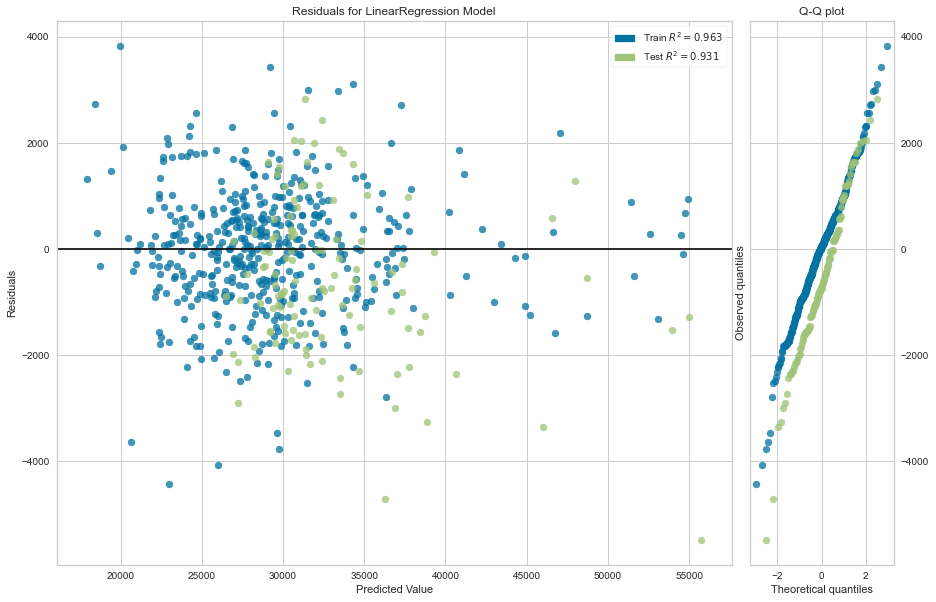

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
# Residual plots to determine heteroscedasticity and whether constant variance is violated

residual = ResidualsPlot(lr, hist=False, qqplot=True, size=(1080,720))

residual.fit(X_train, y_train)
residual.score(X_test, y_test)
residual.show()              

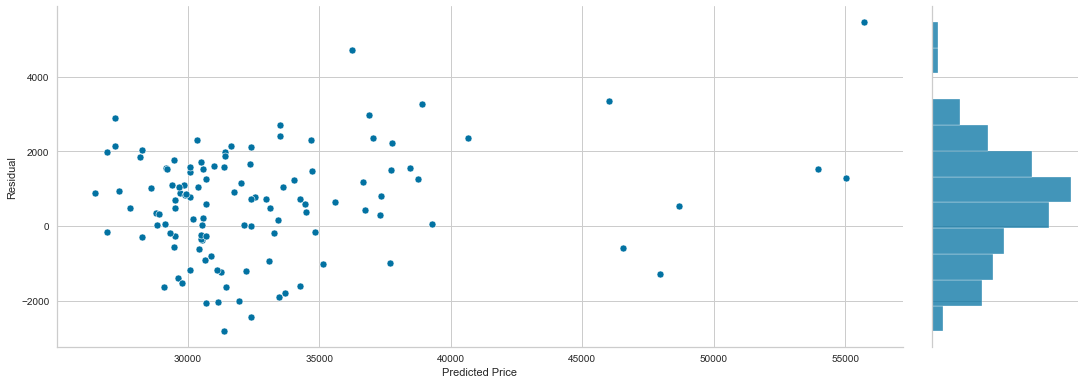

In [11]:
with sns.axes_style('whitegrid'):
    r = sns.jointplot(x=ypred_lr, y=y_test-ypred_lr, height=12)
    r.set_axis_labels('Predicted Price', 'Residual')
    r.fig.set_figwidth(15)
    r.fig.set_figheight(6)
    r.ax_marg_x._visible=False   